CV Project Face Recognition CNN using Dlib

---

Kishan Murali - A20601493

Vandan Vaishya - A20552904

---


Flow of Content: (Represents the project workflow)


### 1. Introduction
Objective: Develop an efficient and robust facial emotion recognition system using convolutional neural networks (CNN) to classify emotions into seven categories: angry, disgust, fear, happy, sad, surprise, and neutral.
Datasets: Use the JAFFE and KDEF datasets, accessed from Google Drive, which contain grayscale images of faces with labeled emotions.
### 2. Data Preparation
Face Detection:
Use a landmark-based algorithm, such as dlib’s 68-point facial landmark detector, to locate and crop facial regions.
Crop and mask regions covering the primary face features (e.g., jawline, eyebrows, eyes), using landmarks 1-27 and convex hull masking to extract the face region.
### 3. Preprocessing
Contrast and Noise Handling:
Histogram Equalization: Apply histogram equalization on the cropped faces to normalize intensity and enhance contrast.
Noise Reduction: Use a bilateral filter to smooth the images while preserving edges.
Edge Enhancement: Apply a 2D convolutional filter for high-frequency edge enhancement to strengthen facial feature visibility.
Image Resizing: Resize all images to a standard dimension of 180x180 pixels.
### 4. Model Architecture
CNN Structure:

Convolutional Layers: The model has three convolutional layers, each followed by batch normalization for training stability. The convolutional layers use the ReLU activation function, helping the model capture essential features from the input images. Dropout is applied after each convolutional block to reduce the risk of overfitting.

Pooling Layers: The model includes alternating max-pooling and average-pooling layers. These pooling layers help in reducing the spatial dimensions, focusing on the most significant features while reducing computational load.

Fully Connected Layers: After flattening the output from the convolutional layers, the model has two dense (fully connected) layers. These dense layers are designed to learn complex representations from the extracted features. Dropout and batch normalization are applied to improve regularization and training stability.

Output Layer: The final dense layer with softmax activation outputs the probabilities for each of the seven emotion classes (Angry, Disgust, Fear, Happy, Neutral, Sad, Surprise). The softmax activation function enables multi-class classification, where each class is assigned a probability.
### 5. Training Process
Epochs: 30
Batch Size: Set batch size to 32
Early Stopping: Implement early stopping to halt training once validation accuracy plateaus, avoiding overfitting.

### 6. Evaluation Metrics
Accuracy: Track accuracy for each class to measure the model’s overall performance.
Precision, Recall, F1-Score: Calculate these metrics per class to gauge the model's performance on individual emotions.

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### STEP - 3 Model Training and Result Visualisation

Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths for train, validation, and test directories
train_dir = '/content/drive/MyDrive/CV_Project_Dataset/Split_Data_Directory/train'
val_dir = '/content/drive/MyDrive/CV_Project_Dataset/Split_Data_Directory/val'
test_dir = '/content/drive/MyDrive/CV_Project_Dataset/Split_Data_Directory/test'

# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 180, 180  # Match the resized dimensions

# Create ImageDataGenerator instances for each dataset split
train_datagen = ImageDataGenerator(
    rescale=1.0/255,          # Normalize pixel values to [0, 1]
    rotation_range=10,        #  rotation for data augmentation
    width_shift_range=0.1,    #  horizontal shift for data augmentation
    height_shift_range=0.1,   #  vertical shift for data augmentation
    zoom_range=0.1            #  zoom for data augmentation
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)  # Only rescale for validation and test

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 2135 images belonging to 7 classes.
Found 454 images belonging to 7 classes.
Found 453 images belonging to 7 classes.


Model Architecture

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define model dimensions
IMG_HEIGHT, IMG_WIDTH = 180, 180
NUM_CLASSES = 7

# Build the model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))  # Reduced dropout

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))  # Reduced dropout

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Convolutional Layer 4
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

# Flatten the output
model.add(Flatten())

# Dense Layers
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model with an increased learning rate
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/CV_Project_Dataset/best_CNN_model.keras',
                             monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Model Summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 178, 178, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 178, 178, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 87, 87, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 41, 41, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 18, 18, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │       5,308,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 5,733,767 (21.87 MB)

 Trainable params: 5,732,039 (21.87 MB)

 Non-trainable params: 1,728 (6.75 KB)

Model Training

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/CV_Project_Dataset/best_model.keras',
                             monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,  # Start with 30 epochs, adjust based on performance
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 407ms/step - accuracy: 0.2008 - loss: 2.6412 - val_accuracy: 0.1278 - val_loss: 3.2507
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 23s 241ms/step - accuracy: 0.3446 - loss: 1.9254 - val_accuracy: 0.1388 - val_loss: 5.6638
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 237ms/step - accuracy: 0.3612 - loss: 1.8267 - val_accuracy: 0.1388 - val_loss: 4.4607
Epoch 4/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 252ms/step - accuracy: 0.3856 - loss: 1.6465 - val_accuracy: 0.1872 - val_loss: 3.7565
Epoch 5/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 236ms/step - accuracy: 0.4203 - loss: 1.5556 - val_accuracy: 0.1674 - val_loss: 3.3680
Epoch 6/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 256ms/step - accuracy: 0.4491 - loss: 1.4157 - val_accuracy: 0.1278 - val_loss: 3.1949
Epoch 7/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 253ms/step - accuracy: 0.4740 - loss: 1.3146 - val_accuracy: 0.1894 - val_loss: 2.8533
Epoch 8/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 250ms/step - accuracy: 0.5259 - loss: 1.2426 - val_accu

Classification Report

In [11]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Get true labels and predictions for the test set
y_true = test_generator.classes  # True labels
y_pred_probs = model.predict(test_generator)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class predictions

# Classification report with F1-score, support, precision, and recall
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Overall accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step
Classification Report:
              precision    recall  f1-score   support

       Angry       0.86      0.60      0.71        60
     Disgust       0.66      0.88      0.76        60
        Fear       0.52      0.62      0.56        73
       Happy       0.92      0.97      0.94        68
     Neutral       0.80      0.50      0.62        64
         Sad       0.54      0.77      0.63        60
    Surprise       0.83      0.57      0.68        68

    accuracy                           0.70       453
   macro avg       0.73      0.70      0.70       453
weighted avg       0.73      0.70      0.70       453

Test Accuracy: 0.70


Visualisation and Plots

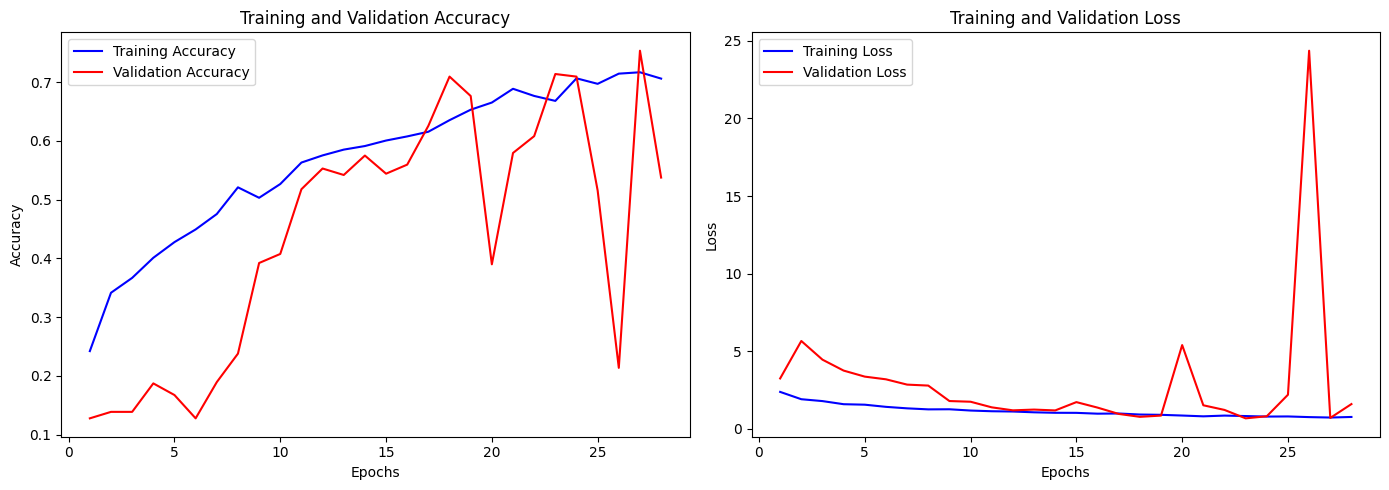

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step


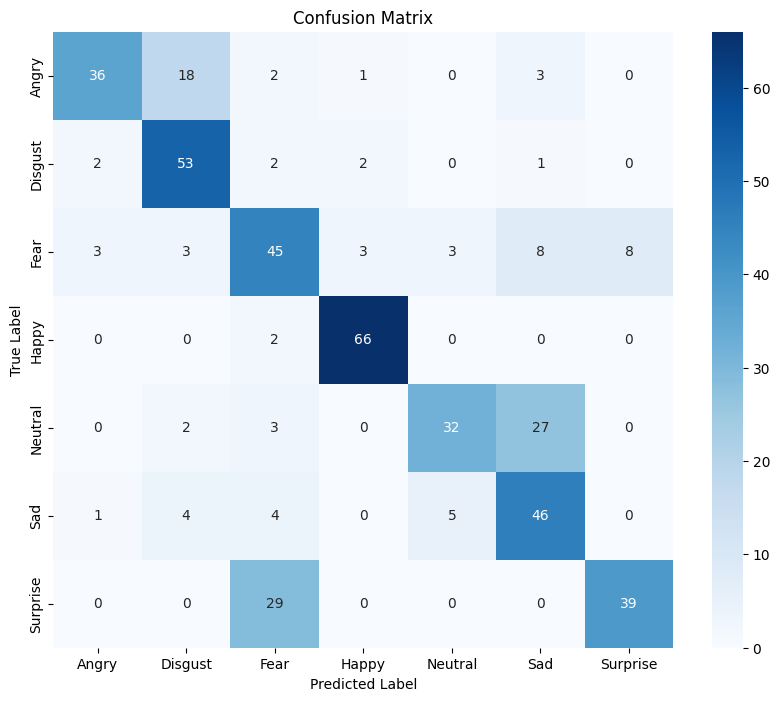

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Plot Training and Validation Accuracy and Loss
def plot_training_history(history):
    """Plot the training and validation accuracy and loss."""
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], 'b-', label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], 'b-', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# 2. Confusion Matrix Plot
def plot_confusion_matrix(true_labels, predictions, class_names):
    """Plot the confusion matrix."""
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Generate predictions
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)

# Plot confusion matrix
class_names = list(test_generator.class_indices.keys())  # Extract class names from the generator
plot_confusion_matrix(y_true, y_pred, class_names)